In [ ]:
#Decision Tree Classifier in Python
#darknurd@aman_saha 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
heart_data = pd.read_csv('heart_data.csv')

In [7]:
X = heart_data.values[:,0:13]

In [8]:
Y = heart_data.values[:,13]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.931
Accuracy on test set: 0.667


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=[str(1),str(2)],
feature_names = None, impurity=False, filled=True)

In [13]:
import graphviz

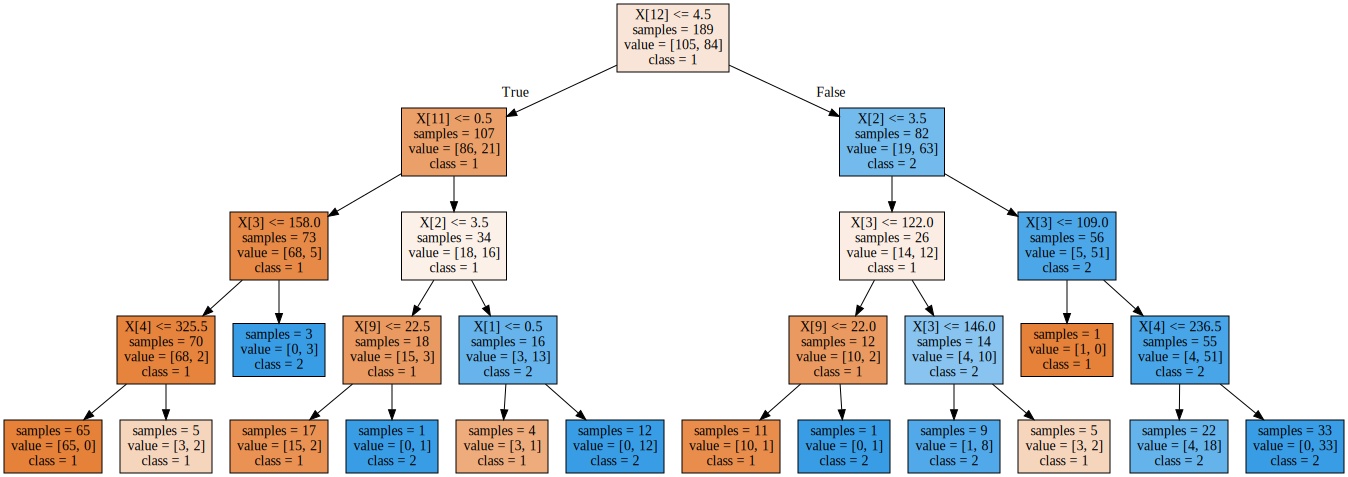

In [14]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
print("Feature importances:\n()", format(tree.feature_importances_))

('Feature importances:\n()', '[ 0.          0.04600443  0.19398299  0.17079952  0.03214778  0.          0.\n  0.          0.          0.04069844  0.          0.10224248  0.41412437]')


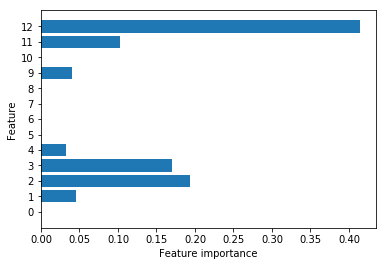

In [16]:
def plot_feature_importances_heart(model):
    n_features = heart_data.shape[1]-1
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_heart(tree)
